In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpeg to dog.jpeg


In [3]:
img = cv2.imread('dog.jpeg')
img = cv2.resize(img, (round(img.shape[1]/6), round(img.shape[0]/6)))

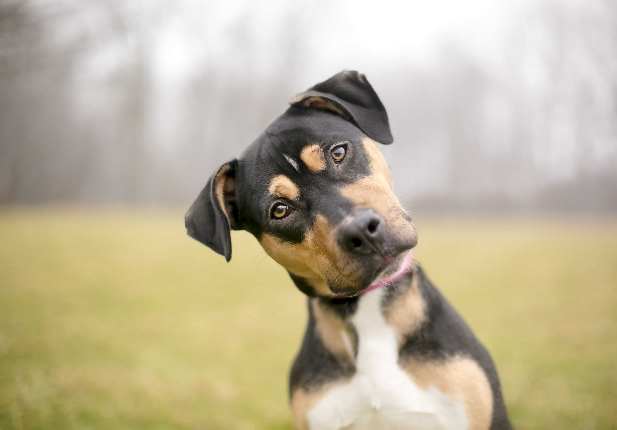

In [4]:
cv2_imshow(img)

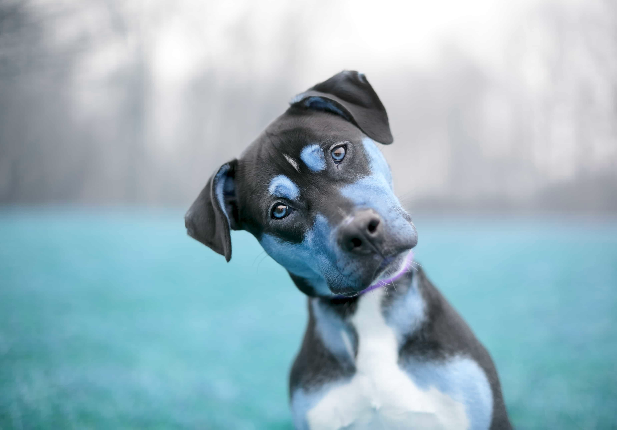

In [7]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img2)

In [8]:
pixel_vals = img2.reshape((-1,3))

In [9]:
pixel_vals = np.float32(pixel_vals)

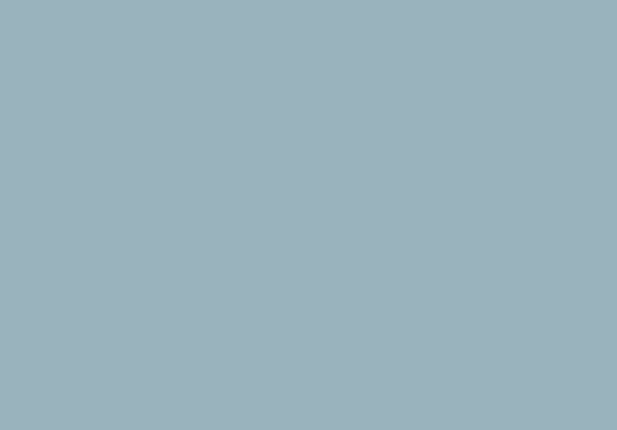

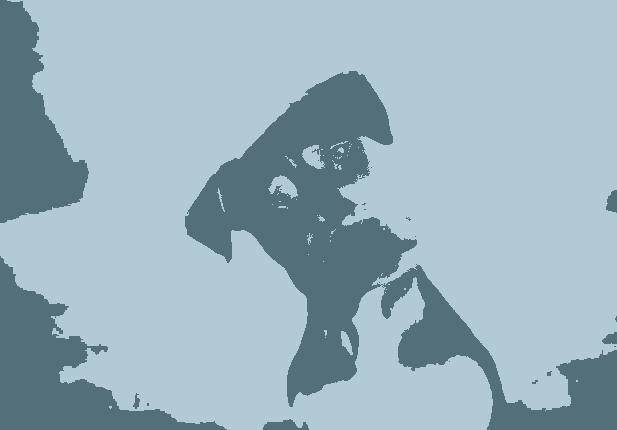

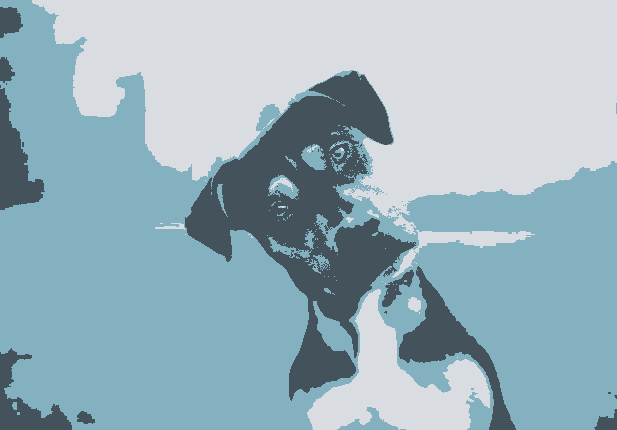

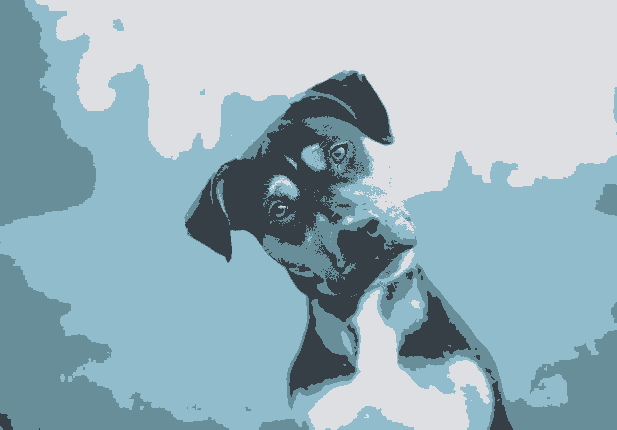

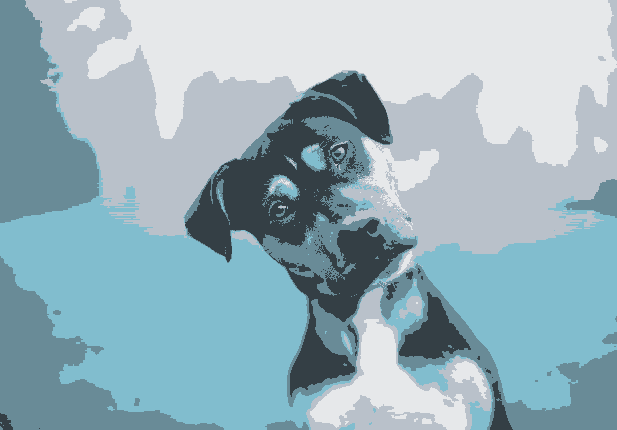

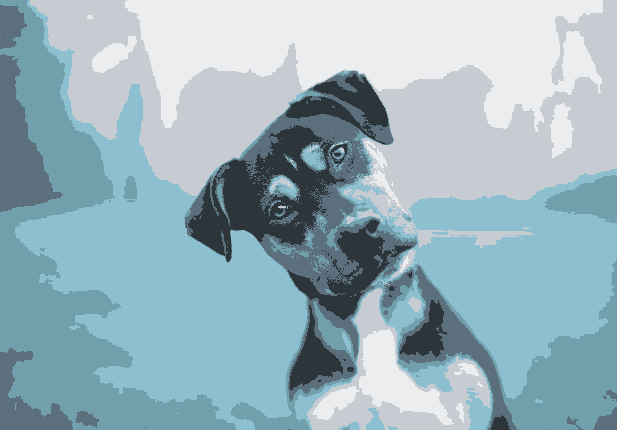

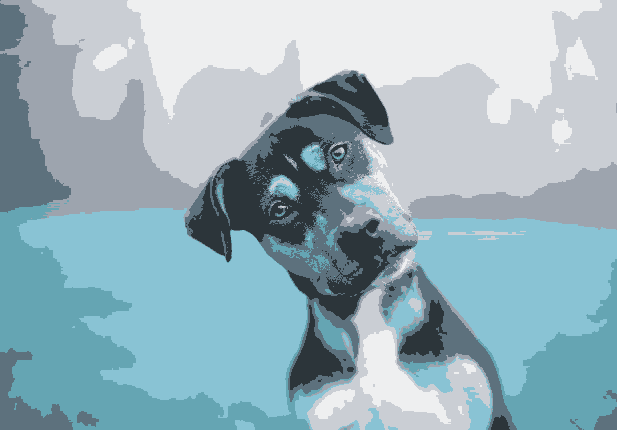

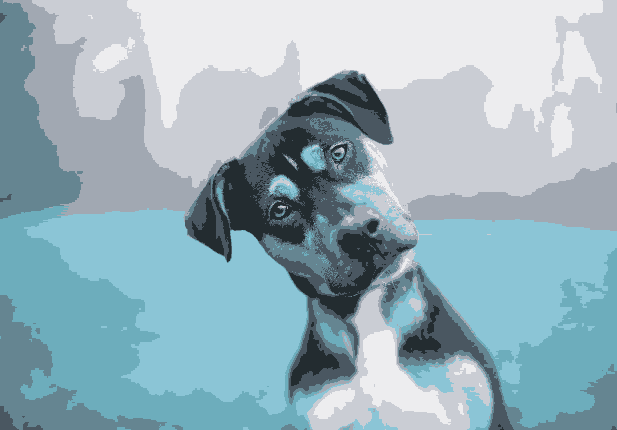

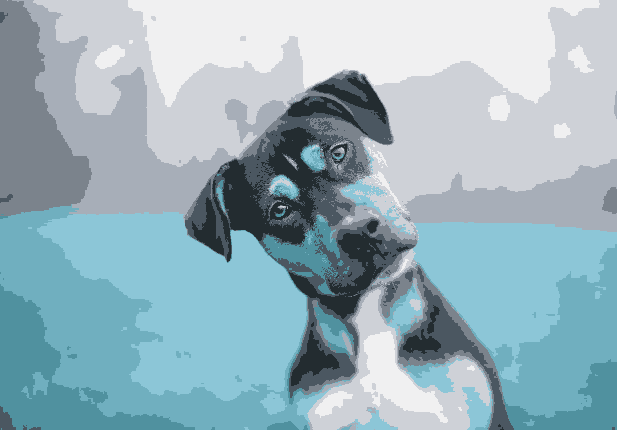

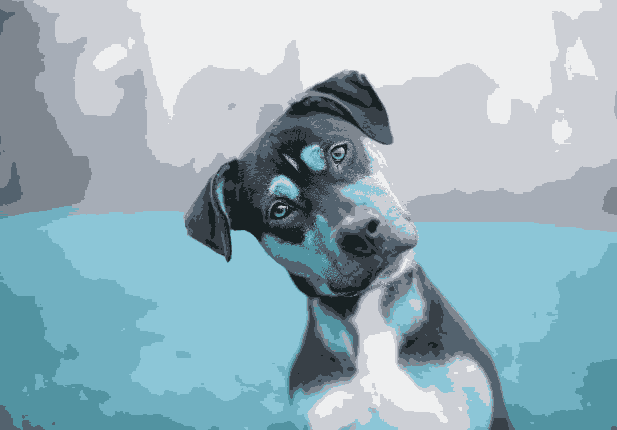

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially chosed for k-means clustering
for i in range(1,11):
  retval, labels, centers = cv2.kmeans(pixel_vals, i, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
  # convert data into 8-bit values
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  
  # reshape data into the original image dimensions
  segmented_image = segmented_data.reshape((img2.shape))
  
  cv2_imshow(segmented_image)